<a href="https://colab.research.google.com/github/abdipourasl/OCD/blob/main/Connectivity_OCD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers
from keras import backend as K

from keras.models import Model, Sequential
from keras.layers import Layer, Dense, Dropout, Input, Activation, TimeDistributed, Reshape, \
                                    LSTM, Bidirectional, Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, \
                                    GlobalAveragePooling2D, Convolution1D
from keras.callbacks import History
from keras.utils import plot_model
from skimage.transform import resize

import cv2
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score
import time
import math
import random

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

def smooth_curve(points, factor=0.0):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def plot_results(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  %matplotlib inline
  plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
  plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
  plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def calculate_test_accuracy():
  fold_results = {}
  start_time = time.time()
  predicted_probability = model.predict(np.array(X_test),steps = len(X_test))
  fold_results['TestTime'] = time.time() - start_time
  fold_results['predicted_probability'] = predicted_probability
  binary_prediction = predicted_probability.round()
  fold_results['binary_prediction'] = binary_prediction
  acc = accuracy_score(binary_prediction, Y_test)
  fold_results['test_accuracy'] = acc
  print('Overall accuracy: {:.2f} %'.format(acc*100))
  return fold_results

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #print(img)
        if img is not None:
            images.append(img)
    return images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/


Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
base_dir1 = '/content/gdrive/My Drive/Conn/PLV_OCD/S14'
base_dir2 = '/content/gdrive/My Drive/Conn/PLV_OCD/S15'
base_dir3 = '/content/gdrive/My Drive/Conn/PLV_OCD/S16'
base_dir4 = '/content/gdrive/My Drive/Conn/PLV_OCD/S17'
base_dir5 = '/content/gdrive/My Drive/Conn/PLV_OCD/S18'
base_dir6 = '/content/gdrive/My Drive/Conn/PLV_OCD/S19'
base_dir7 = '/content/gdrive/My Drive/Conn/PLV_OCD/S20'
base_dir8 = '/content/gdrive/My Drive/Conn/PLV_OCD/S21'
base_dir9 = '/content/gdrive/My Drive/Conn/PLV_OCD/S22'
base_dir10 = '/content/gdrive/My Drive/Conn/PLV_OCD/S23'
base_dir11 = '/content/gdrive/My Drive/Conn/PLV_OCD/S24'
base_dir12 = '/content/gdrive/My Drive/Conn/PLV_OCD/S25'
base_dir13 = '/content/gdrive/My Drive/Conn/PLV_OCD/S26'
base_dir14 = '/content/gdrive/My Drive/Conn/PLV_OCD/S27'
base_dir15 = '/content/gdrive/My Drive/Conn/PLV_OCD/S28'
base_dir16 = '/content/gdrive/My Drive/Conn/PLV_OCD/S29'
base_dir17 = '/content/gdrive/My Drive/Conn/PLV_OCD/S30'
base_dir18 = '/content/gdrive/My Drive/Conn/PLV_OCD/S31'
base_dir19 = '/content/gdrive/My Drive/Conn/PLV_OCD/S32'
base_dir20 = '/content/gdrive/My Drive/Conn/PLV_OCD/S33'
base_dir21 = '/content/gdrive/My Drive/Conn/PLV_OCD/S34'
base_dir22 = '/content/gdrive/My Drive/Conn/PLV_OCD/S35'
base_dir23 = '/content/gdrive/My Drive/Conn/PLV_OCD/S36'
base_dir24 = '/content/gdrive/My Drive/Conn/PLV_OCD/S37'
base_dir25 = '/content/gdrive/My Drive/Conn/PLV_OCD/S38'
base_dir26 = '/content/gdrive/My Drive/Conn/PLV_OCD/S39'
base_dir27 = '/content/gdrive/My Drive/Conn/PLV_OCD/S40'
base_dir28 = '/content/gdrive/My Drive/Conn/PLV_OCD/S41'
base_dir29 = '/content/gdrive/My Drive/Conn/PLV_OCD/S42'
base_dir30 = '/content/gdrive/My Drive/Conn/PLV_OCD/S43'
#base_dir31 = '/content/gdrive/My Drive/Conn/PLV_OCD/S31'
#base_dir32 = '/content/gdrive/My Drive/Conn/PLV_OCD/S32'
#base_dir33 = '/content/gdrive/My Drive/Conn/PLV_OCD/S33'
#base_dir34 = '/content/gdrive/My Drive/Conn/PLV_OCD/S34'
#base_dir35 = '/content/gdrive/My Drive/Conn/PLV_OCD/S35'
#base_dir36 = '/content/gdrive/My Drive/Conn/PLV_OCD/S36'
#base_dir37 = '/content/gdrive/My Drive/Conn/PLV_OCD/S37'
#base_dir38 = '/content/gdrive/My Drive/Conn/PLV_OCD/S38'
#base_dir39 = '/content/gdrive/My Drive/Conn/PLV_OCD/S39'
#base_dir40 = '/content/gdrive/My Drive/Conn/PLV_OCD/S40'
#base_dir41 = '/content/gdrive/My Drive/Conn/PLV_OCD/S41'
#base_dir42 = '/content/gdrive/My Drive/Conn/PLV_OCD/S42'
#base_dir43 = '/content/gdrive/My Drive/Conn/PLV_OCD/S43'




Images_data1=load_images_from_folder(base_dir1)
Images_data2=load_images_from_folder(base_dir2)
Images_data3=load_images_from_folder(base_dir3)
Images_data4=load_images_from_folder(base_dir4)
Images_data5=load_images_from_folder(base_dir5)
Images_data6=load_images_from_folder(base_dir6)
Images_data7=load_images_from_folder(base_dir7)
Images_data8=load_images_from_folder(base_dir8)
Images_data9=load_images_from_folder(base_dir9)
Images_data10=load_images_from_folder(base_dir10)
Images_data11=load_images_from_folder(base_dir11)
Images_data12=load_images_from_folder(base_dir12)
Images_data13=load_images_from_folder(base_dir13)
Images_data14=load_images_from_folder(base_dir14)
Images_data15=load_images_from_folder(base_dir15)
Images_data16=load_images_from_folder(base_dir16)
Images_data17=load_images_from_folder(base_dir17)
Images_data18=load_images_from_folder(base_dir18)
Images_data19=load_images_from_folder(base_dir19)
Images_data20=load_images_from_folder(base_dir20)
Images_data21=load_images_from_folder(base_dir21)
Images_data22=load_images_from_folder(base_dir22)
Images_data23=load_images_from_folder(base_dir23)
Images_data24=load_images_from_folder(base_dir24)
Images_data25=load_images_from_folder(base_dir25)
Images_data26=load_images_from_folder(base_dir26)
Images_data27=load_images_from_folder(base_dir27)
Images_data28=load_images_from_folder(base_dir28)
Images_data29=load_images_from_folder(base_dir29)
Images_data30=load_images_from_folder(base_dir30)
#Images_data31=load_images_from_folder(base_dir31)
#Images_data32=load_images_from_folder(base_dir32)
#Images_data33=load_images_from_folder(base_dir33)
#Images_data34=load_images_from_folder(base_dir34)
#Images_data35=load_images_from_folder(base_dir35)
#Images_data36=load_images_from_folder(base_dir36)
#Images_data37=load_images_from_folder(base_dir37)
#Images_data38=load_images_from_folder(base_dir38)
#Images_data39=load_images_from_folder(base_dir39)
#Images_data40=load_images_from_folder(base_dir40)
#Images_data41=load_images_from_folder(base_dir41)
#Images_data42=load_images_from_folder(base_dir42)
#Images_data43=load_images_from_folder(base_dir43)


args = (Images_data1, Images_data2,Images_data3, Images_data4, Images_data5,
        Images_data6, Images_data7, Images_data8,Images_data9, Images_data10, Images_data11,
        Images_data12, Images_data13, Images_data14,Images_data15, Images_data16, Images_data17,
        Images_data18, Images_data19, Images_data20,Images_data21, Images_data22, Images_data23,
        Images_data24, Images_data25, Images_data26,Images_data27, Images_data28, Images_data29,
        Images_data30)

append_Image1 = np.concatenate(args)

print(np.shape(append_Image1))
#plt.imshow(append_Image[0])

(270, 224, 224, 3)


In [ ]:
#base_dir1 = '/content/gdrive/My Drive/Conn/PLV_NC/S1'
#base_dir2 = '/content/gdrive/My Drive/Conn/PLV_NC/S2'
#base_dir3 = '/content/gdrive/My Drive/Conn/PLV_NC/S3'
#base_dir4 = '/content/gdrive/My Drive/Conn/PLV_NC/S4'
#base_dir5 = '/content/gdrive/My Drive/Conn/PLV_NC/S5'
#base_dir6 = '/content/gdrive/My Drive/Conn/PLV_NC/S6'
#base_dir7 = '/content/gdrive/My Drive/Conn/PLV_NC/S7'
#base_dir8 = '/content/gdrive/My Drive/Conn/PLV_NC/S8'
#base_dir9 = '/content/gdrive/My Drive/Conn/PLV_NC/S9'
#base_dir10 = '/content/gdrive/My Drive/Conn/PLV_NC/S10'
#base_dir11 = '/content/gdrive/My Drive/Conn/PLV_NC/S11'
#base_dir12 = '/content/gdrive/My Drive/Conn/PLV_NC/S12'
#base_dir13 = '/content/gdrive/My Drive/Conn/PLV_NC/S13'
base_dir14 = '/content/gdrive/My Drive/Conn/PLV_NC/S14'
base_dir15 = '/content/gdrive/My Drive/Conn/PLV_NC/S15'
base_dir16 = '/content/gdrive/My Drive/Conn/PLV_NC/S16'
base_dir17 = '/content/gdrive/My Drive/Conn/PLV_NC/S17'
base_dir18 = '/content/gdrive/My Drive/Conn/PLV_NC/S18'
base_dir19 = '/content/gdrive/My Drive/Conn/PLV_NC/S19'
base_dir20 = '/content/gdrive/My Drive/Conn/PLV_NC/S20'
base_dir21 = '/content/gdrive/My Drive/Conn/PLV_NC/S21'
base_dir22 = '/content/gdrive/My Drive/Conn/PLV_NC/S22'
base_dir23 = '/content/gdrive/My Drive/Conn/PLV_NC/S23'
base_dir24 = '/content/gdrive/My Drive/Conn/PLV_NC/S24'
base_dir25 = '/content/gdrive/My Drive/Conn/PLV_NC/S25'
base_dir26 = '/content/gdrive/My Drive/Conn/PLV_NC/S26'
base_dir27 = '/content/gdrive/My Drive/Conn/PLV_NC/S27'
base_dir28 = '/content/gdrive/My Drive/Conn/PLV_NC/S28'
base_dir29 = '/content/gdrive/My Drive/Conn/PLV_NC/S29'
base_dir30 = '/content/gdrive/My Drive/Conn/PLV_NC/S30'
base_dir31 = '/content/gdrive/My Drive/Conn/PLV_NC/S31'
base_dir32 = '/content/gdrive/My Drive/Conn/PLV_NC/S32'
base_dir33 = '/content/gdrive/My Drive/Conn/PLV_NC/S33'
base_dir34 = '/content/gdrive/My Drive/Conn/PLV_NC/S34'
base_dir35 = '/content/gdrive/My Drive/Conn/PLV_NC/S35'
base_dir36 = '/content/gdrive/My Drive/Conn/PLV_NC/S36'
base_dir37 = '/content/gdrive/My Drive/Conn/PLV_NC/S37'
base_dir38 = '/content/gdrive/My Drive/Conn/PLV_NC/S38'
base_dir39 = '/content/gdrive/My Drive/Conn/PLV_NC/S39'
base_dir40 = '/content/gdrive/My Drive/Conn/PLV_NC/S40'
base_dir41 = '/content/gdrive/My Drive/Conn/PLV_NC/S41'
base_dir42 = '/content/gdrive/My Drive/Conn/PLV_NC/S42'
base_dir43 = '/content/gdrive/My Drive/Conn/PLV_NC/S43'


#Images_data1=load_images_from_folder(base_dir1)
#Images_data2=load_images_from_folder(base_dir2)
#Images_data3=load_images_from_folder(base_dir3)
#Images_data4=load_images_from_folder(base_dir4)
#Images_data5=load_images_from_folder(base_dir5)
#Images_data6=load_images_from_folder(base_dir6)
#Images_data7=load_images_from_folder(base_dir7)
#Images_data8=load_images_from_folder(base_dir8)
#Images_data9=load_images_from_folder(base_dir9)
#Images_data10=load_images_from_folder(base_dir10)
#Images_data11=load_images_from_folder(base_dir11)
#Images_data12=load_images_from_folder(base_dir12)
#Images_data13=load_images_from_folder(base_dir13)
Images_data14=load_images_from_folder(base_dir14)
Images_data15=load_images_from_folder(base_dir15)
Images_data16=load_images_from_folder(base_dir16)
Images_data17=load_images_from_folder(base_dir17)
Images_data18=load_images_from_folder(base_dir18)
Images_data19=load_images_from_folder(base_dir19)
Images_data20=load_images_from_folder(base_dir20)
Images_data21=load_images_from_folder(base_dir21)
Images_data22=load_images_from_folder(base_dir22)
Images_data23=load_images_from_folder(base_dir23)
Images_data24=load_images_from_folder(base_dir24)
Images_data25=load_images_from_folder(base_dir25)
Images_data26=load_images_from_folder(base_dir26)
Images_data27=load_images_from_folder(base_dir27)
Images_data28=load_images_from_folder(base_dir28)
Images_data29=load_images_from_folder(base_dir29)
Images_data30=load_images_from_folder(base_dir30)
Images_data31=load_images_from_folder(base_dir31)
Images_data32=load_images_from_folder(base_dir32)
Images_data33=load_images_from_folder(base_dir33)
Images_data34=load_images_from_folder(base_dir34)
Images_data35=load_images_from_folder(base_dir35)
Images_data36=load_images_from_folder(base_dir36)
Images_data37=load_images_from_folder(base_dir37)
Images_data38=load_images_from_folder(base_dir38)
Images_data39=load_images_from_folder(base_dir39)
Images_data40=load_images_from_folder(base_dir40)
Images_data41=load_images_from_folder(base_dir41)
Images_data42=load_images_from_folder(base_dir42)
Images_data43=load_images_from_folder(base_dir43)


args = (Images_data14, Images_data15,Images_data16, Images_data17, Images_data18,
        Images_data19, Images_data20, Images_data21,Images_data22, Images_data23, Images_data24,
        Images_data25, Images_data26, Images_data27,Images_data28, Images_data29, Images_data30,
        Images_data31, Images_data32, Images_data33,Images_data34, Images_data35, Images_data36,
        Images_data37, Images_data38, Images_data39,Images_data40, Images_data41, Images_data42,
        Images_data43)

append_Image2 = np.concatenate(args)

print(np.shape(append_Image2))
#plt.imshow(append_Image[0])

(270, 224, 224, 3)


In [ ]:
#base_dir1 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S1'
#base_dir2 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S2'
#base_dir3 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S3'
#base_dir4 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S4'
#base_dir5 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S5'
#base_dir6 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S6'
#base_dir7 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S7'
#base_dir8 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S8'
#base_dir9 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S9'
#base_dir10 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S10'
#base_dir11 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S11'
#base_dir12 = '/content/gdrive/My Drive/Conn/PLV_test_OCD/S12'


base_dir1 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S1'
base_dir2 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S2'
base_dir3 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S3'
base_dir4 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S4'
base_dir5 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S5'
base_dir6 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S6'
base_dir7 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S7'
base_dir8 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S8'
base_dir9 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S9'
base_dir10 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S10'
base_dir11 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S11'
base_dir12 = '/content/gdrive/My Drive/Conn/PLV_OCD3/S12'

Images_data1=load_images_from_folder(base_dir1)
Images_data2=load_images_from_folder(base_dir2)
Images_data3=load_images_from_folder(base_dir3)
Images_data4=load_images_from_folder(base_dir4)
Images_data5=load_images_from_folder(base_dir5)
Images_data6=load_images_from_folder(base_dir6)
Images_data7=load_images_from_folder(base_dir7)
Images_data8=load_images_from_folder(base_dir8)
Images_data9=load_images_from_folder(base_dir9)
Images_data10=load_images_from_folder(base_dir10)
Images_data11=load_images_from_folder(base_dir11)
Images_data12=load_images_from_folder(base_dir12)


args = (Images_data1, Images_data2, Images_data3,Images_data4, Images_data5, Images_data6,
        Images_data7, Images_data8, Images_data9,Images_data10, Images_data11, Images_data12)

append_Image3 = np.concatenate(args)

print(np.shape(append_Image3))
#plt.imshow(append_Image[0])

(108, 224, 224, 3)


In [ ]:
base_dir1 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S1'
base_dir2 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S2'
base_dir3 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S3'
base_dir4 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S4'
base_dir5 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S5'
base_dir6 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S6'
base_dir7 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S7'
base_dir8 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S8'
base_dir9 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S9'
base_dir10 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S10'
base_dir11 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S11'
base_dir12 = '/content/gdrive/My Drive/Conn/PLV_test_NC/S12'


Images_data1=load_images_from_folder(base_dir1)
Images_data2=load_images_from_folder(base_dir2)
Images_data3=load_images_from_folder(base_dir3)
Images_data4=load_images_from_folder(base_dir4)
Images_data5=load_images_from_folder(base_dir5)
Images_data6=load_images_from_folder(base_dir6)
Images_data7=load_images_from_folder(base_dir7)
Images_data8=load_images_from_folder(base_dir8)
Images_data9=load_images_from_folder(base_dir9)
Images_data10=load_images_from_folder(base_dir10)
Images_data11=load_images_from_folder(base_dir11)
Images_data12=load_images_from_folder(base_dir12)


args = (Images_data1, Images_data2, Images_data3,Images_data4, Images_data5, Images_data6,
        Images_data7, Images_data8, Images_data9,Images_data10, Images_data11, Images_data12)

append_Image4 = np.concatenate(args)

print(np.shape(append_Image4))
#plt.imshow(append_Image[0])

(108, 224, 224, 3)


In [ ]:
#os.listdir(os.path.join(base_dir1))

#args = (append_Image1, append_Image4, append_Image2,append_Image3)
#args1 = (append_Image1[0:9*35], append_Image3[0:9*8],append_Image2[0:9*35], append_Image4[0:9*8])
args1 = (append_Image1, append_Image2)
append_Image = np.concatenate(args1)

#args2 = (append_Image1[9*35:9*43], append_Image3[9*8:9*12],append_Image2[9*35:9*43], append_Image4[9*8:9*12])
args2 = (append_Image3, append_Image4)
test_append_Image = np.concatenate(args2)


print(np.shape(append_Image))
print(np.shape(test_append_Image))
#plt.imshow(append_Image[0])

(540, 224, 224, 3)
(216, 224, 224, 3)


In [ ]:
#tag = list(range(0,86))
#tag_label = 43*[1]+43*[0]

#from sklearn.model_selection import train_test_split
#tag_train, tag_test, tag_label_train, tag_label_test = train_test_split(tag,tag_label,test_size=0.1, random_state=300)

tag_train = list(range(0,60))
#tag_label_train = 43*[1]+43*[0]
tag_label_train = 30*[1]+30*[0]

tag_test = list(range(0,24))
#tag_label_test = 12*[1]+12*[0]
tag_label_test = 12*[1]+12*[0]

In [ ]:
print(tag_test)
print(tag_label_test)
print(tag_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
X_train=np.empty((0, 224,224,3))
X_test=np.empty((0, 224,224,3))
Y_train=[]
Y_test=[]
#for tag in tag_train:
#  X_train = X_train + Images_data[tag*15:tag*15+15]
#print(np.shape(X_train))
for tag in tag_test:
  test1 = test_append_Image[tag*9:tag*9+9]
  X_test= np.append(X_test, test1, axis = 0)
  print(np.shape(X_test))
  len(X_test)
#for label in tag_label_train:
#  Y_train = Y_train + [label]*15

for label in tag_label_test:
  Y_test = Y_test + [label]*9
print(np.shape(Y_test))

(9, 224, 224, 3)
(18, 224, 224, 3)
(27, 224, 224, 3)
(36, 224, 224, 3)
(45, 224, 224, 3)
(54, 224, 224, 3)
(63, 224, 224, 3)
(72, 224, 224, 3)
(81, 224, 224, 3)
(90, 224, 224, 3)
(99, 224, 224, 3)
(108, 224, 224, 3)
(117, 224, 224, 3)
(126, 224, 224, 3)
(135, 224, 224, 3)
(144, 224, 224, 3)
(153, 224, 224, 3)
(162, 224, 224, 3)
(171, 224, 224, 3)
(180, 224, 224, 3)
(189, 224, 224, 3)
(198, 224, 224, 3)
(207, 224, 224, 3)
(216, 224, 224, 3)
(216,)


In [ ]:
def create_model():
  conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
  #print(conv_base.summary())
  conv_base.trainable = True
  set_trainable = False

  for layer in conv_base.layers:
     if layer.name == 'block5_conv3':
          set_trainable = True
     if set_trainable:
        layer.trainable = True
     else:
        layer.trainable = False

  print("Model edited")

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  #model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128,kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
  model.add(BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.35))
  #model.add(layers.Dense(1, activation='sigmoid'))
  model.add(layers.Dense(1))
  #model.add(BatchNormalization())
  model.add(layers.Activation('sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=2e-6),metrics=['accuracy'])
  #print(model.summary())

  #if fold_count == 1:
  #  conv_base.summary()
    #plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  return model


In [ ]:
fold_count=0
hist_VGG16 = {}
seed = 300
np.random.seed(seed)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
print(kf)
#tag_train, tag_label_train

KFold(n_splits=5, random_state=300, shuffle=True)


Model edited
Epoch 1/50
54/54 [==============================] - 20s 108ms/step - loss: 0.9465 - accuracy: 0.5926 - val_loss: 1.0911 - val_accuracy: 0.5556
Epoch 2/50
54/54 [==============================] - 3s 62ms/step - loss: 0.8350 - accuracy: 0.6181 - val_loss: 0.7031 - val_accuracy: 0.7315
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.7125 - accuracy: 0.7384 - val_loss: 0.5693 - val_accuracy: 0.8056
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.6143 - accuracy: 0.7778 - val_loss: 0.4906 - val_accuracy: 0.8426
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.5519 - accuracy: 0.8542 - val_loss: 0.4415 - val_accuracy: 0.8889
Epoch 6/50
54/54 [==============================] - 3s 62ms/step - loss: 0.5288 - accuracy: 0.8171 - val_loss: 0.4047 - val_accuracy: 0.9259
Epoch 7/50
54/54 [==============================] - 3s 64ms/step - loss: 0.4934 - accuracy: 0.8634 - val_loss: 0.3722 - val_accuracy: 0.944

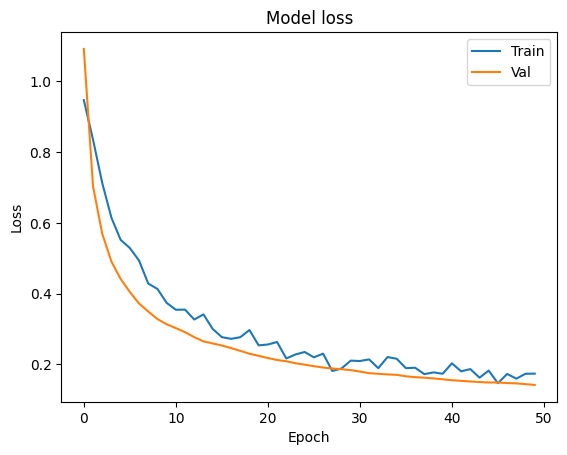

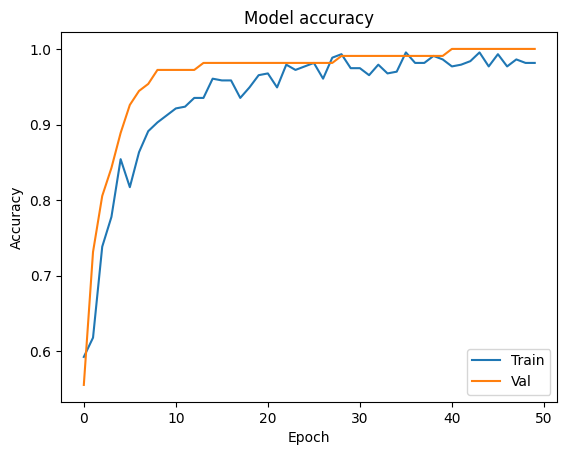

216/216 [==============================] - 3s 9ms/step
Overall accuracy: 68.98 %
fold_1 done!
Model edited
Epoch 1/50
54/54 [==============================] - 6s 74ms/step - loss: 0.9874 - accuracy: 0.5116 - val_loss: 1.1592 - val_accuracy: 0.5741
Epoch 2/50
54/54 [==============================] - 4s 76ms/step - loss: 0.7783 - accuracy: 0.6667 - val_loss: 0.9301 - val_accuracy: 0.6111
Epoch 3/50
54/54 [==============================] - 4s 78ms/step - loss: 0.7288 - accuracy: 0.7037 - val_loss: 0.7954 - val_accuracy: 0.7407
Epoch 4/50
54/54 [==============================] - 4s 78ms/step - loss: 0.6181 - accuracy: 0.7847 - val_loss: 0.7188 - val_accuracy: 0.7870
Epoch 5/50
54/54 [==============================] - 4s 77ms/step - loss: 0.5325 - accuracy: 0.8264 - val_loss: 0.6479 - val_accuracy: 0.8148
Epoch 6/50
54/54 [==============================] - 4s 78ms/step - loss: 0.5145 - accuracy: 0.8519 - val_loss: 0.5958 - val_accuracy: 0.8426
Epoch 7/50
54/54 [=============================

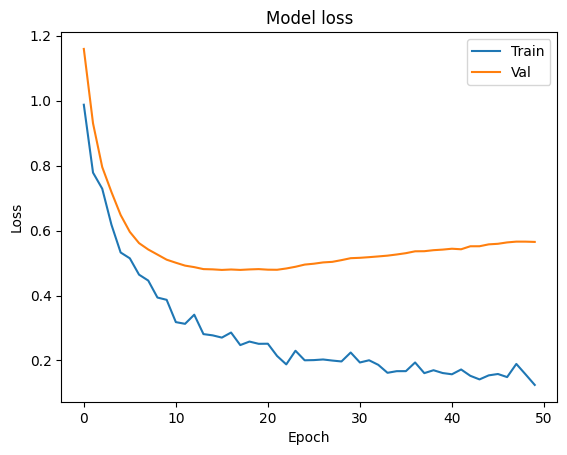

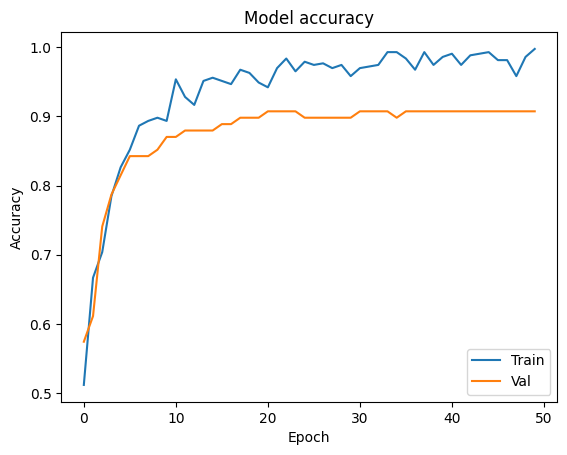

216/216 [==============================] - 2s 9ms/step
Overall accuracy: 71.76 %
fold_2 done!
Model edited
Epoch 1/50
54/54 [==============================] - 6s 86ms/step - loss: 1.0010 - accuracy: 0.5602 - val_loss: 0.8028 - val_accuracy: 0.6481
Epoch 2/50
54/54 [==============================] - 4s 67ms/step - loss: 0.8252 - accuracy: 0.6481 - val_loss: 0.6703 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 4s 66ms/step - loss: 0.7004 - accuracy: 0.7338 - val_loss: 0.6025 - val_accuracy: 0.8241
Epoch 4/50
54/54 [==============================] - 4s 66ms/step - loss: 0.6100 - accuracy: 0.7917 - val_loss: 0.5501 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 4s 67ms/step - loss: 0.5666 - accuracy: 0.8449 - val_loss: 0.5038 - val_accuracy: 0.8796
Epoch 6/50
54/54 [==============================] - 4s 81ms/step - loss: 0.5356 - accuracy: 0.8380 - val_loss: 0.4634 - val_accuracy: 0.8981
Epoch 7/50
54/54 [=============================

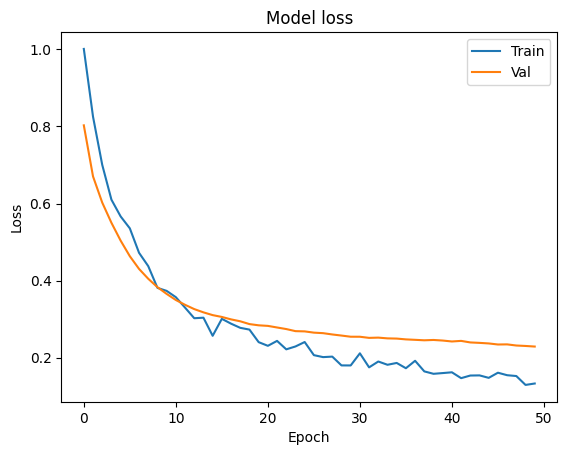

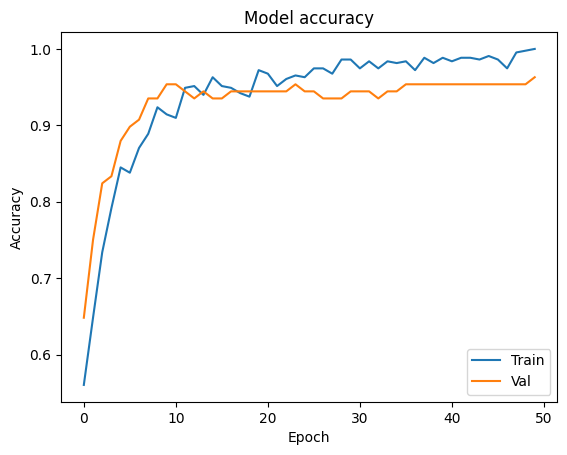

216/216 [==============================] - 2s 9ms/step
Overall accuracy: 71.76 %
fold_3 done!
Model edited
Epoch 1/50
54/54 [==============================] - 7s 90ms/step - loss: 1.0281 - accuracy: 0.5255 - val_loss: 0.9119 - val_accuracy: 0.6667
Epoch 2/50
54/54 [==============================] - 4s 66ms/step - loss: 0.8619 - accuracy: 0.6157 - val_loss: 0.7056 - val_accuracy: 0.7778
Epoch 3/50
54/54 [==============================] - 4s 78ms/step - loss: 0.7927 - accuracy: 0.6921 - val_loss: 0.6022 - val_accuracy: 0.8426
Epoch 4/50
54/54 [==============================] - 4s 79ms/step - loss: 0.6964 - accuracy: 0.7477 - val_loss: 0.5382 - val_accuracy: 0.8889
Epoch 5/50
54/54 [==============================] - 4s 68ms/step - loss: 0.6093 - accuracy: 0.7894 - val_loss: 0.4838 - val_accuracy: 0.8981
Epoch 6/50
54/54 [==============================] - 4s 79ms/step - loss: 0.5523 - accuracy: 0.8264 - val_loss: 0.4376 - val_accuracy: 0.9352
Epoch 7/50
54/54 [=============================

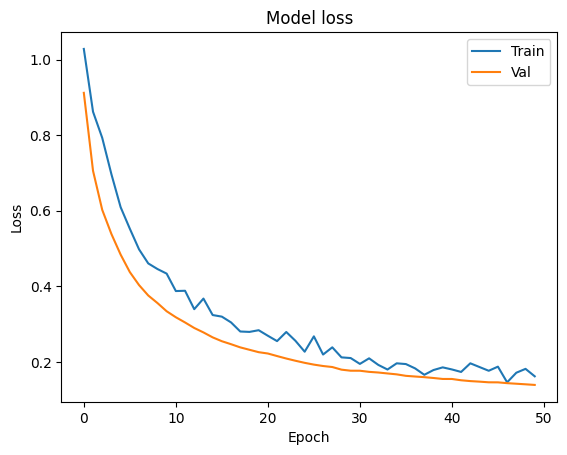

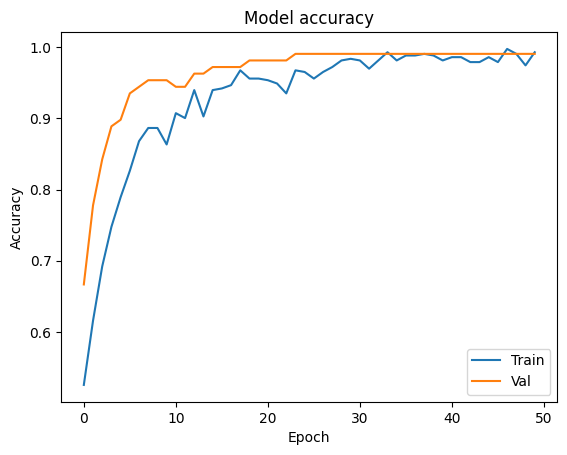

216/216 [==============================] - 2s 9ms/step
Overall accuracy: 67.59 %
fold_4 done!
Model edited
Epoch 1/50
54/54 [==============================] - 7s 90ms/step - loss: 1.1734 - accuracy: 0.4838 - val_loss: 1.2405 - val_accuracy: 0.6019
Epoch 2/50
54/54 [==============================] - 4s 66ms/step - loss: 0.9830 - accuracy: 0.5463 - val_loss: 0.8075 - val_accuracy: 0.6389
Epoch 3/50
54/54 [==============================] - 4s 78ms/step - loss: 0.8502 - accuracy: 0.6343 - val_loss: 0.6523 - val_accuracy: 0.7500
Epoch 4/50
54/54 [==============================] - 4s 79ms/step - loss: 0.7643 - accuracy: 0.6505 - val_loss: 0.5670 - val_accuracy: 0.8241
Epoch 5/50
54/54 [==============================] - 4s 79ms/step - loss: 0.7053 - accuracy: 0.7176 - val_loss: 0.5084 - val_accuracy: 0.8796
Epoch 6/50
54/54 [==============================] - 4s 68ms/step - loss: 0.6375 - accuracy: 0.7407 - val_loss: 0.4696 - val_accuracy: 0.8889
Epoch 7/50
54/54 [=============================

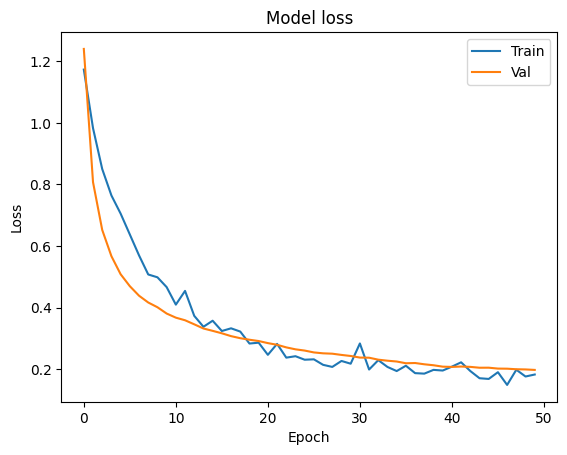

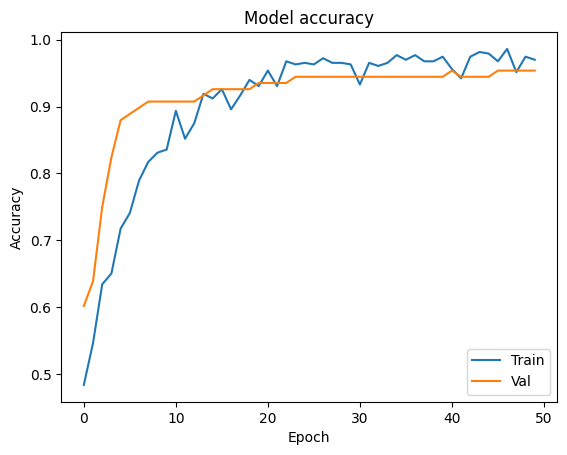

216/216 [==============================] - 2s 9ms/step
Overall accuracy: 70.83 %
fold_5 done!


In [ ]:
for train_index, val_index in kf.split(tag_train,tag_label_train):
    fold_count = fold_count + 1
    #if fold_count >= 2:
      #break;

    x_train=np.empty((0, 224,224,3))
    x_val=np.empty((0, 224,224,3))
    y_train=[]
    y_val=[]

    for tag in train_index:
      train1 = append_Image[tag_train[tag]*9:tag_train[tag]*9+9]
      x_train= np.append( x_train, train1, axis = 0)
      #print(np.shape(X_train))

    for tag in val_index:
      val1 = append_Image[tag_train[tag]*9:tag_train[tag]*9+9]
      x_val= np.append( x_val, val1, axis = 0)
      #print(np.shape(X_test))

    for label in train_index:
      y_train = y_train + [tag_label_train[label]]*9

    for label in val_index:
      y_val = y_val + [tag_label_train[label]]*9

    x_train, x_val = np.array(x_train), np.array(x_val)
    y_train, y_val = np.array(y_train), np.array(y_val)
    #x_train, x_val = np.array(X_train)[train_index], np.array(X_train)[val_index]
    #y_train, y_val = np.array(Y_train)[train_index], np.array(Y_train)[val_index]

    model = create_model()
    history1 = model.fit(x_train,y_train,epochs=50, batch_size=8, validation_data = (x_val,y_val), shuffle=True)
    #plot_results(history)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

    hist_VGG16['fold'+str(fold_count)+'_history']=history1.history
    hist_VGG16['fold'+str(fold_count)+'_results'] = calculate_test_accuracy()
    print('fold_'+str(fold_count)+' done!')